# RMSProp

In [1]:
def rmsprop(parameters, sqrs, lr, alpha):
    eps = 1e-10
    for param, sqr in zip(parameters, sqrs):
        sqr[:] = alpha * sqr + (1 - alpha) * param.grad.data ** 2
        div = lr / t.sqrt(sqr + eps) * param.grad.data
        param.data = param.data - div

In [2]:
import numpy as np
import torch as t
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch import nn
import time
%matplotlib inline

In [3]:
def data_tf(x):
    x = np.array(x, dtype = 'float32') / 255
    x = (x - 0.5) / 0.5
    x = x.reshape((-1))
    x = t.from_numpy(x)
    return x

In [4]:
train_set = MNIST('./data', train = True, transform = data_tf, download = True)
test_set = MNIST('./data', train = False, transform = data_tf, download = True)

#定义loss函数
criterion = nn.CrossEntropyLoss()

In [5]:
train_data = DataLoader(train_set, batch_size = 64, shuffle = True)
#使用Sequential定义两层网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10))

In [6]:
#初始化梯度平方项
sqrs = []
for param in net.parameters():
    sqrs.append(t.zeros_like(param.data))
    
    
#开始训练
losses = []
idx = 0
start = time.time()
for e in range(5):
    train_loss = 0
    for value, label in train_data:
        #前向传播
        out = net(value)
        loss = criterion(out, label)
        
        #反向传播
        net.zero_grad()
        loss.backward()
        rmsprop(net.parameters(), sqrs, 1e-3, 0.9)  #学习率设置为0.001， alpha为0.9
        
        #记录误差
        train_loss += loss.data.item()
        if idx%30 == 0:
            losses.append(loss.data.item())
        idx += 1
    print('epoch:{}, train_loss:{:.6f}'.format(e, train_loss / len(train_data)))
end = time.time()
print('训练时间：{:.6f}'.format(end - start))

epoch:0, train_loss:0.376497
epoch:1, train_loss:0.171160
epoch:2, train_loss:0.125161
epoch:3, train_loss:0.102905
epoch:4, train_loss:0.087967
训练时间：78.082774


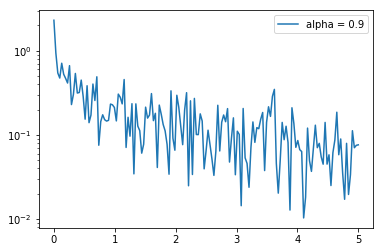

In [7]:
x_axis = np.linspace(0, 5, len(losses), endpoint = True)
plt.semilogy(x_axis, losses, label = "alpha = 0.9")
plt.legend(loc = 'best')

In [8]:
train_data = DataLoader(train_set, batch_size = 64, shuffle = True)

net_1 = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10))

In [10]:
#将alpha设为0.999
sqrs = []
for param in net_1.parameters():
    sqrs.append(t.zeros_like(param.data))

losses_1 = []
idx = 0
start = time.time()
for e in range(5):
    train_loss = 0
    for value, label in train_data:
        #前向传播
        out = net_1(value)
        loss = criterion(out, label)
        
        #反向传播
        net_1.zero_grad()
        loss.backward()
        rmsprop(net_1.parameters(), sqrs, 1e-3, 0.999) #学习率为0.001， alpha为0.999
        
        #计算误差
        train_loss += loss.data.item()
        if idx % 30 == 0:
            losses_1.append(loss.data.item())
        idx += 1
    print('epoch:{}, train_loss:{:.6f}'.format(e, train_loss / len(train_data)))

end = time.time()
print('训练时间：{:.6f}'.format(end - start))

epoch:0, train_loss:0.470832
epoch:1, train_loss:0.188200
epoch:2, train_loss:0.147582
epoch:3, train_loss:0.124795
epoch:4, train_loss:0.108322
训练时间：74.041660


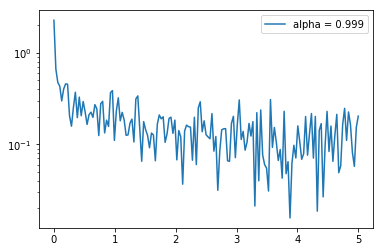

In [11]:
x_axis = np.linspace(0, 5, len(losses_1), endpoint = True)
plt.semilogy(x_axis, losses_1, label = 'alpha = 0.999')
plt.legend(loc = 'best')

当然 pytorch 也内置了 rmsprop 的方法，非常简单，只需要调用 `torch.optim.RMSprop()` 就可以了，下面是例子

In [13]:
train_data = DataLoader(train_set, batch_size = 64, shuffle = True)

net_2 = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10))

optimizer = t.optim.RMSprop(net_2.parameters(), lr = 1e-3, alpha = 0.9)

In [14]:
#开始训练
losses_2 = []
idx = 0
start = time.time()
for e in range(5):
    train_loss = 0
    for value, label in train_data:
        out = net_2(value)
        loss = criterion(out, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.data.item()
        if idx % 30 == 0:
            losses_2.append(loss.data.item())
        idx += 1
    print('epoch:{}, train_loss:{:.6f}'.format(e, train_loss / len(train_data)))
    
end = time.time()
print('训练时间:{:.6f}'.format(end - start))

epoch:0, train_loss:0.374184
epoch:1, train_loss:0.170954
epoch:2, train_loss:0.126602
epoch:3, train_loss:0.103885
epoch:4, train_loss:0.089481
训练时间:95.032592


No handles with labels found to put in legend.


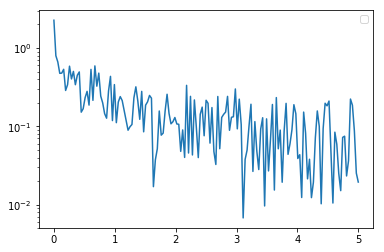

In [15]:
x_axis = np.linspace(0, 5, len(losses_2), endpoint = True)
plt.semilogy(x_axis, losses_2)
plt.legend(loc = 'best')